In [134]:
import numpy as np
import pandas as pd
import pyagrum as gum
import pyagrum.lib.notebook as gnb
import pyagrum.causal as csl
import pyagrum.causal.notebook as cslnb
import itertools
import networkx as nx
import matplotlib.pyplot as plt

In [135]:
import pyagrum as gum

# Step 1: Learn the structure and parameters from the data
learner = gum.BNLearner("data.csv")
bn = learner.learnBN()  # Learn the structure and parameters based on data

# -----------------------------------------
# Step 2: Modify the learned Bayesian Network structure
# -----------------------------------------
# Add arcs to define relationships between the variables.
bn.addArc("Age", "job")
bn.addArc("job", "SocioStatus")
bn.addArc("Education", "SocioStatus")
bn.addArc("Income", "SocioStatus")
bn.addArc("Physical_Activity", "Physical_Attribute")
bn.addArc("Obesity", "Physical_Attribute")
bn.addArc("SocioStatus", "Depression")
bn.addArc("Physical_Attribute", "Depression")
bn.addArc("Genetic_Predisposition", "Depression")
bn.addArc("Adverse_Childhood", "Depression")

# -----------------------------------------
# Step 3: Manually Set CPTs for Independent Nodes
# -----------------------------------------
# Manually set the CPT for the "Education" variable (previously set by you)
bn.cpt("Education")[0] = 0.1926  # Probability for state 0
bn.cpt("Education")[1] = 0.3995  # Probability for state 1
bn.cpt("Education")[2] = 0.4123  # Probability for state 2

# Manually set the CPT for the "Age" variable (previously set by you)
bn.cpt("Age")[0] = 0.3661  # Probability for state 0
bn.cpt("Age")[1] = 0.4156  # Probability for state 1
bn.cpt("Age")[2] = 0.2182  # Probability for state 2

# Manually set the CPT for the "Obesity" variable
bn.cpt("Obesity")[0] = 0.4300  # Probability for state 0 (Obesity = 0)
bn.cpt("Obesity")[1] = 0.5700  # Probability for state 1 (Obesity = 1)

# Similarly, set the CPT for other independent nodes as needed
bn.cpt("Genetic_Predisposition")[0] = 0.5  # Probability of 0 for "Genetic_Predisposition"
bn.cpt("Genetic_Predisposition")[1] = 0.5  # Probability of 1 for "Genetic_Predisposition"
bn.cpt("Adverse_Childhood")[0] = 0.361  # Probability of 0 for "Adverse_Childhood"
bn.cpt("Adverse_Childhood")[1] = 0.639  # Probability of 1 for "Adverse_Childhood"

# -----------------------------------------
# Step 4: Re-learn the parameters (CPTs) after modifying the structure and manually setting independent node probabilities
# -----------------------------------------
# Relearn the parameters with the manually set probabilities for independent nodes
bn = learner.learnParameters(bn)  # Re-learn parameters based on the modified structure

# -----------------------------------------
# Step 5: Verify and work with the learned BN
# -----------------------------------------
print(bn)  # Print the structure of the learned network

# If you need to print the Conditional Probability Tables (CPTs) for all nodes:
for node in bn.nodes():
    var_name = bn.variable(node).name()
    print(f"Statistics for {var_name}:")
    print(bn.cpt(var_name))

# Optionally, save the learned network to a file.
gum.saveBN(bn, "learned_network_with_manual_probabilities.net")


BN{nodes: 11, arcs: 10, domainSize: 10368, dim: 54, mem: 832o}
Statistics for Age:

  Age                        |
0        |1        |2        |
---------|---------|---------|
 0.3372  | 0.3294  | 0.3334  |

Statistics for Education:

  Education                  |
0        |1        |2        |
---------|---------|---------|
 0.3412  | 0.3320  | 0.3268  |

Statistics for Income:

  Income                     |
0        |1        |2        |
---------|---------|---------|
 0.3308  | 0.3350  | 0.3342  |

Statistics for job:

      ||  job              |
Age   ||0        |1        |
------||---------|---------|
0     || 0.5184  | 0.4816  |
1     || 0.5088  | 0.4912  |
2     || 0.5105  | 0.4895  |

Statistics for SocioStatus:

                    ||  SocioStatus      |
job   |Educat|Income||0        |1        |
------|------|------||---------|---------|
0     |0     |0     || 0.4947  | 0.5053  |
1     |0     |0     || 0.5069  | 0.4931  |
0     |1     |0     || 0.4667  | 0.5333  |
1     |

In [136]:
import pandas as pd
import pyagrum as gum

print("\nLearned Bayesian Network:")
print(bn)

# (Optional) Save the learned network to a file.
gum.saveBN(bn, "learned_network.net")

# Perform inference if desired.
ie = gum.LazyPropagation(bn)
ie.makeInference()
print("\nPosterior probability table for 'Depression':")
print(ie.posterior("Depression"))



Learned Bayesian Network:
BN{nodes: 11, arcs: 10, domainSize: 10368, dim: 54, mem: 832o}

Posterior probability table for 'Depression':

  Depression       |
0        |1        |
---------|---------|
 0.4956  | 0.5044  |



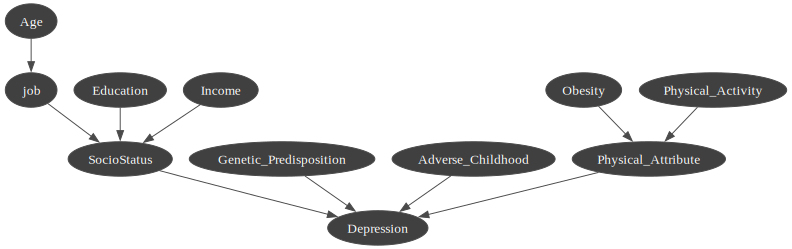

In [137]:
gnb.show(bn, size="11")  # jobrease graphical scaling

In [138]:
# Iterate over all nodes in the BN and show their CPTs:
for node in bn.nodes():
    var_name = bn.variable(node).name()
    print(f"Statistics for {var_name}:")
    gnb.showPotential(bn.cpt(node))

Statistics for Age:


Statistics for Education:


Statistics for Income:


Statistics for job:


Statistics for SocioStatus:


Statistics for Physical_Activity:


Statistics for Physical_Attribute:


Statistics for Genetic_Predisposition:


Statistics for Adverse_Childhood:


Statistics for Depression:


Statistics for Obesity:


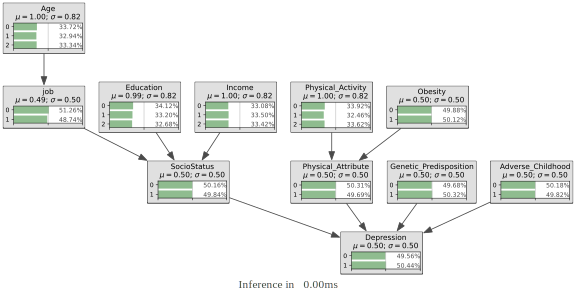

In [139]:
gnb.showInference(bn)